# Lineární klasifikace do více tříd pomocí funkce Softmax

Úloha zaměřená na implementaci paralelního lineární klasifikáru pomocí funkce softmax.


### Softmax
- Funkce softmax má c vstupů a c výstupů. 
- Všechny výstupy jsou kladná čísla. 
- Součet všech výstupů dohromady je roven číslu 1.
$$\widehat{y_c} = softmax(u) = \frac{e^{u_c}}{\sum_{d=0}^{c} {e^{u_d}}} $$

Výsledkem klasifikace je třída, pro kterou je hodnota softmaxu nejvyšší.

### Odhad parametrů modelu

Model nemá jeden vektor parametrů $\theta$, ale matici parametrů $\Theta$

Příklad:
- Vektor $x$ má dimenzi 3 (3 příznaky)
- Klasifikujeme do 4 tříd
$$ \Theta^T = 
        \begin{bmatrix}
        [\theta_{00} & \theta_{01} & \theta_{02} & \theta_{03}] \\
        [\theta_{10} & \theta_{11} & \theta_{12} & \theta_{13}] \\
        [\theta_{20} & \theta_{21} & \theta_{22} & \theta_{23}] \\
        [\theta_{30} & \theta_{31} & \theta_{32} & \theta_{33}] \\
        \end{bmatrix}  $$

#### Pomoc sumy:

$$ \Theta_{t+1} = \Theta_{t} - \alpha \sum_{i=0}^{N} {x_i}^T (\widehat{y_i} - y_i) $$  
kde $\alpha$ je velikost kroku (learning rate), 

$y_i$ je vektor, obsahující hodnotu 1 na indexu správné třídy: $y_i \in [...0, 0, 1, 0,..]$,

$\widehat{y_i} = softmax(x_i^T \Theta)^T$


#### Pomocí  matice:
Maticová implementace je řádově výpočetně efektivnější.

$$ \Theta_{t+1} = \Theta_{t} - \alpha X^T (\widehat{Y} - Y) $$  
$Y$ je matice nul a jedniček dle indexů tříd v datech (one_hot_encoding), 

#### Postup:
1. Parametr $\theta$ (resp. váhy $w$ a bias $b$) se inicializuje na malé náhodné hodnoty
2. Na vstup se přivedou všechna trénovací data a na výstupu se tím pádem objeví posloupnost nul a jedniček (obsahuje chyby)
3. Na základě chyb se upraví hodnoty vah
4. Kroky 2. a 3. se postupně opakují dokud dostatečně klesá chybovost klasifikátoru (nebo podle počtu iteraci)



### Klasifikace pro 2 třídy:


In [3]:
import numpy as np
import usu

npzfile = np.load('data/data_07_2cl.npz')

data = npzfile['data']
ref = npzfile['ref']
data.shape, ref.shape



((100, 2), (100, 1))

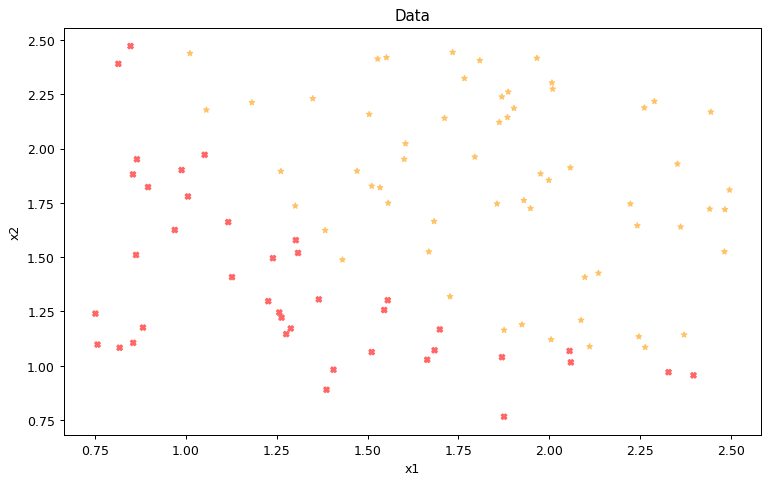

In [4]:
usu.drawSoftmax(data,ref)


In [5]:
def softmax(u):
    """
    vstupem muze byt skalar, vektor, nebo matice 
    """
    #################################################################
    # ZDE DOPLNIT
            
    #################################################################
    return y

usu.checkSoftmax(softmax)

True

In [6]:
def computeThetaSGD(x, y, alpha=0.01, iterations=1000):
    #################################################################
    # ZDE DOPLNIT

    # pridani sloupce pro bias
    x = ...
    
    #inicializace theta    
    theta = ...
    
    #nezapomente provest one hot encoding hodnot y
    ...
        
    for i in range(iterations):
    
    
    #################################################################

    return theta


In [7]:
theta = computeThetaSGD(data, ref)
theta

array([[ 9.10851553, -9.10851553],
       [-3.01430677,  3.01430677],
       [-2.90413336,  2.90413336]])

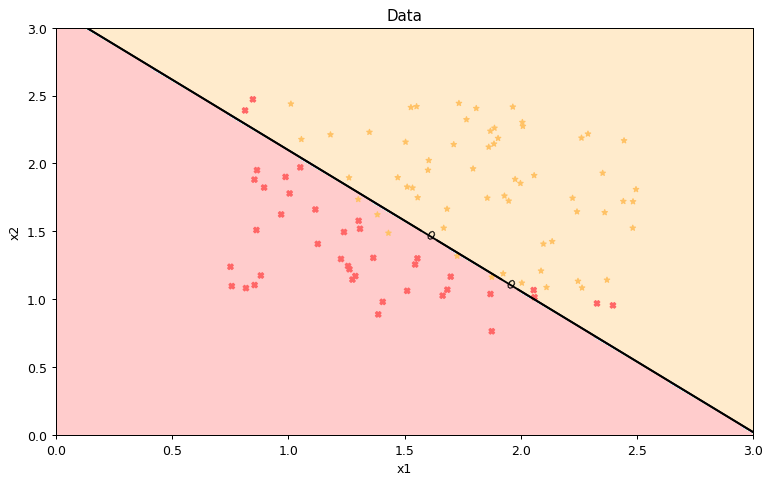

In [8]:
usu.drawSoftmax(data, ref, theta, softmax)


In [9]:
def predict(x,theta):
    #################################################################
    # ZDE DOPLNIT
    
    ...
    
    #################################################################
    return classes


In [10]:
x_pred = np.array([[1, 1],[ 2, 2]])
predict(x_pred,theta)


array([0, 1], dtype=int64)

### Klasifikace pro více tříd:
#### 3 třídy:


In [11]:
npzfile = np.load('data/data_07_3cl_ez.npz') 

data = npzfile['data']
ref = npzfile['ref']

In [12]:
theta = computeThetaSGD(data, ref)
theta

array([[ 5.07711635e-01, -5.03105973e-01, -4.60566172e-03],
       [ 2.72038774e+00,  5.91185553e+00, -8.63224327e+00],
       [-7.47227524e+00,  4.70478069e+00,  2.76749455e+00]])

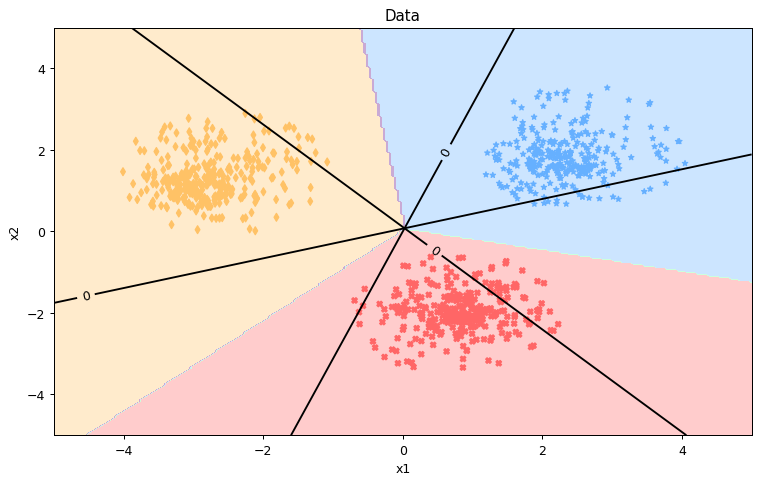

In [13]:
usu.drawSoftmax(data, ref, theta, softmax)


In [14]:
x_pred = np.array([[-3, 1],[ 0, -2],[ 3, 2]])
predict(x_pred,theta)


array([2, 0, 1], dtype=int64)

#### 4 třídy:

In [15]:
npzfile = np.load('data/data_07_4cl.npz')

data = npzfile['data']
ref = npzfile['ref']


In [16]:
theta = computeThetaSGD(data, ref)
theta

array([[-1.69592530e-04,  1.78920810e-04,  2.52757259e-05,
        -3.46040058e-05],
       [ 8.17559935e+00,  6.92671210e+00, -7.25371298e+00,
        -7.84859846e+00],
       [-6.79704211e+00,  6.90764576e+00, -7.30088112e+00,
         7.19027748e+00]])

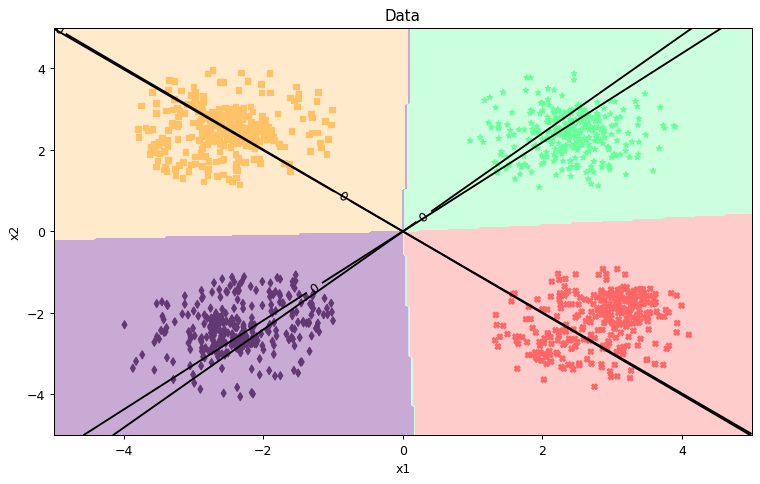

In [17]:
usu.drawSoftmax(data, ref, theta, softmax)


In [18]:
x_pred = np.array([[-3, -1],[ -3, 2],[ 3, -1],[ 3, 2]])
predict(x_pred,theta)


array([2, 3, 0, 1], dtype=int64)

#### 5 tříd:

In [19]:
npzfile = np.load('data/data_07_5cl.npz')

data = npzfile['data']
ref = npzfile['ref']


In [20]:
theta = computeThetaSGD(data, ref)
theta

array([[-2.48175733, -3.17075268, -3.11566359, -2.61417318, 11.38234678],
       [ 7.25756266,  6.37331542, -6.94692967, -6.42019195, -0.26375646],
       [-5.6309561 ,  6.33801352, -6.94636603,  6.31988487, -0.08057625]])

d:\OneDrive\vyuka\USU\usu-podklady.repo\usu.py:167: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(u, v, z.T, [0], colors='k')


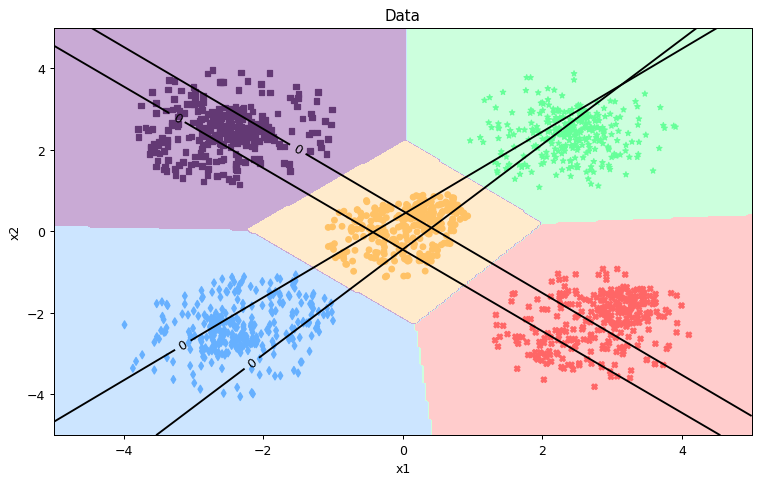

In [20]:
usu.drawSoftmax(data, ref, theta, softmax)


In [21]:
x_pred = np.array([[-3, -1],[ -3, 2],[ 3, -1],[ 3, 2],[0, 0]])
predict(x_pred,theta)


array([2, 3, 0, 1, 4], dtype=int64)